# Aim:  To predict whether an individual makes over 50,000 a year or less

In [192]:
# import necessay libraries

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset

In [271]:
dataset=pd.read_csv("/kaggle/input/cenusincome-csv/censusIncome.csv")

In [195]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [196]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Checking duplicate values

In [197]:
dataset.duplicated().sum()

24

In [198]:
dataset.drop_duplicates(inplace=True)

In [199]:
dataset.duplicated().sum()

0

In [200]:
dataset.shape

(32537, 15)

In [201]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


# Checking for Null Values

In [202]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [203]:
# this is showing me no null values are present in dataset.

In [260]:
dataset.nunique()

age                73
workclass           8
education           7
education-num      16
marital-status      3
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     41
annual_income       2
dtype: int64

In [261]:
# Insights
# so our dataset is spread in the age group of 17 to 99 years.
# we have got maximum hours per week 99. and minimum is 1.

# #Ensuring no null values in data set:
# whether null values are presented in the form of any symbol or not?

# Value Count Function:

In [262]:
dataset.columns 

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'annual_income'],
      dtype='object')

In [263]:
dataset["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [264]:
dataset["age"].value_counts()

age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [265]:
dataset["age"].nunique()

73

In [266]:
dataset['workclass'].value_counts()

workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

# There 1836 null values in the form of ? symbol in workclass feature.

In [267]:
dataset['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [268]:
dataset['workclass'].nunique()

8

In [272]:
dataset[dataset["workclass"] == "?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [273]:
dataset['fnlwgt'].value_counts()

fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64

In [274]:
dataset['education-num'].value_counts()

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [275]:
dataset['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [276]:
dataset['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [277]:
# There 1843 null values in the form of ? symbol in occupation feature.

In [278]:
dataset['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [279]:
dataset['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [280]:
dataset['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [281]:
dataset['capital-gain'].value_counts()

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [282]:
dataset['hours-per-week'].value_counts()

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

In [283]:
dataset['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [ ]:
# There 583 null values in the form of ? symbol in native-country feature.

#  creating visualizations:

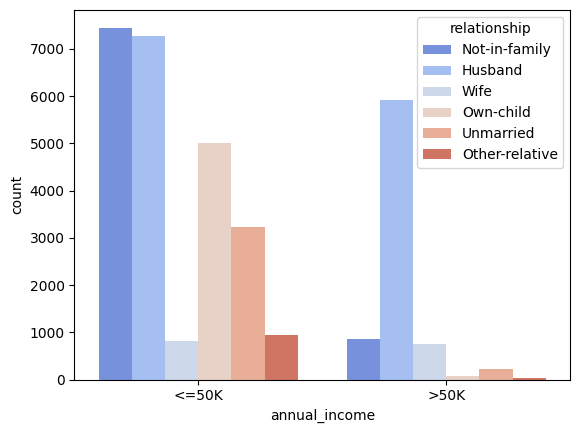

In [284]:
sns.countplot(x='annual_income', palette='coolwarm',hue='relationship',data=dataset);

<Axes: xlabel='annual_income', ylabel='count'>

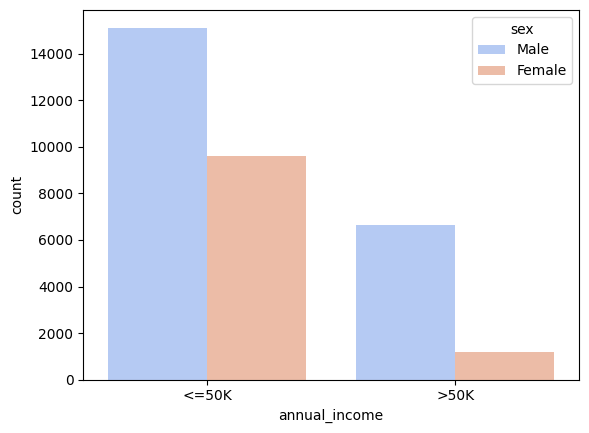

In [285]:
sns.countplot(x='annual_income',palette='coolwarm',hue="sex",data=dataset)

In [286]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [287]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='annual_income', ylabel='count'>

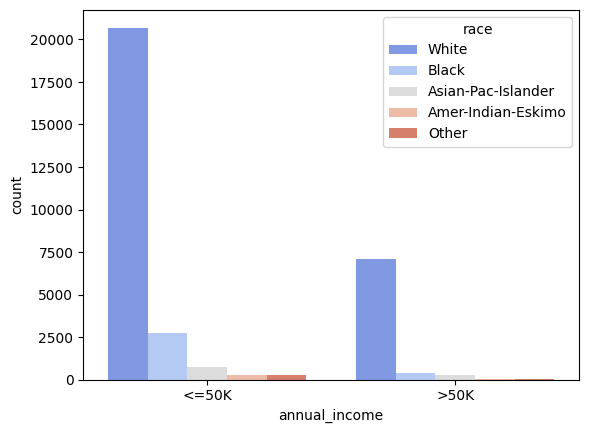

In [288]:
sns.countplot(x='annual_income',palette='coolwarm',hue="race",data=dataset)

# Filling ? values

In [ ]:
# Filling the values with mode

In [289]:
dataset['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [290]:
dataset["workclass"]= dataset['workclass'].replace('?','Private')

In [291]:
dataset['workclass'].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [292]:
dataset['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [293]:
dataset['occupation']= dataset['occupation'].replace('?','Prof-speciality')

In [294]:
dataset['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Prof-speciality      1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [295]:
dataset['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [296]:
dataset['native-country'] = dataset['native-country'].replace('?','United-States')

In [297]:
dataset['native-country'].value_counts()

native-country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [ ]:
# if you want to fill ? symbol with null values, follow below code

# df = df.replace({'?':np.nan})

# percentage of null values in each feature = round(df.isnull().sum() / len(df) *100,  2)

# drop null values 

# df.dropna(inplace=True)

# Dropping unnecessary columns

In [298]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [299]:
dataset.drop('fnlwgt',axis = 1 , inplace=True)

# Featuring Engineering

In [300]:
dataset.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'annual_income'],
      dtype='object')

In [301]:
dataset['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [302]:
dataset['education'] = dataset['education'].replace(['Preschool', '1st-4th','5th-6th','7th-8th','10th','11th','12th'], 'school')
dataset['education'] = dataset['education'].replace('HS-grad','high school')
dataset['education'] = dataset['education'].replace(['Some-college','Assoc-voc','Assoc-acdm','Prof-school'],'higer')
dataset['education'] = dataset['education'].replace('Bachelors','undergrad')
dataset['education'] = dataset['education'].replace('Masters','grad')
dataset['education'] = dataset['education'].replace('Doctorate','doc')

In [303]:
dataset['education'].value_counts()

education
high school    10501
higer          10316
undergrad       5355
school          3739
grad            1723
9th              514
doc              413
Name: count, dtype: int64

In [304]:
# marital-status

dataset['marital-status'] = dataset['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
dataset['marital-status'] = dataset['marital-status'].replace('Never-married ','not-married')
dataset['marital-status'] = dataset['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'orhers')

In [305]:
dataset['marital-status'].value_counts()

marital-status
married          14999
Never-married    10683
orhers            6879
Name: count, dtype: int64

In [306]:
dataset['annual_income'].value_counts()

annual_income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [307]:
dataset['annual_income'] = dataset['annual_income'].replace('<=50K',0)
dataset['annual_income'] = dataset['annual_income'].replace('>50K',1)

/tmp/ipykernel_32/4244938438.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['annual_income'] = dataset['annual_income'].replace('>50K',1)


In [308]:
dataset['annual_income'].value_counts()

annual_income
0    24720
1     7841
Name: count, dtype: int64

# Correlation

In [309]:
dataset_corr = dataset.corr(numeric_only=True)

<Axes: >

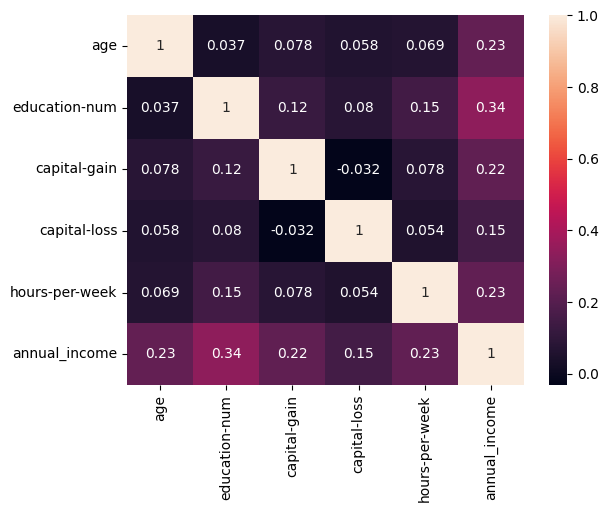

In [310]:
sns.heatmap(dataset_corr, annot = True)

In [311]:
# It seems there is no so much strong correlation between any two variables. but we can see weekly correlation.

# Histogram

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'annual_income'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

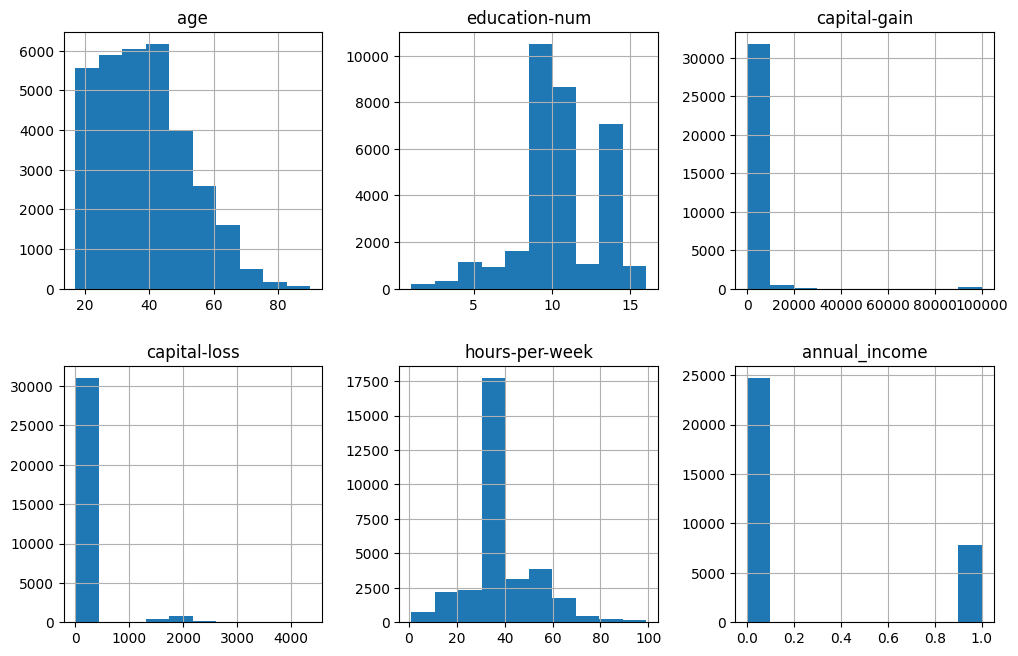

In [312]:
dataset.hist(figsize=(12,12),layout= (3,3), sharex= False)

In [ ]:
# it will work only numerical columns

# Boxplot

age                  Axes(0.125,0.653529;0.227941x0.226471)
education-num     Axes(0.398529,0.653529;0.227941x0.226471)
capital-gain      Axes(0.672059,0.653529;0.227941x0.226471)
capital-loss         Axes(0.125,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.398529,0.381765;0.227941x0.226471)
annual_income     Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

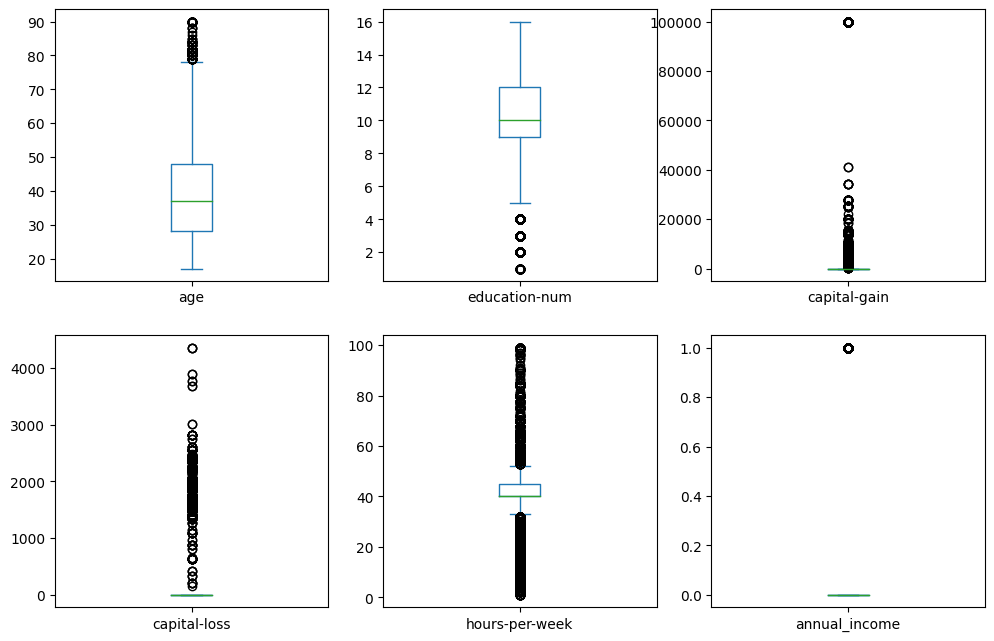

In [314]:
dataset.plot(kind='box',figsize= (12,12),layout= (3,3),subplots=True,sharex= False)

# plotly

In [313]:
px.pie(dataset, values='education-num', names='education', title='% of edu', 
      color_discrete_sequence = px.colors.qualitative.T10)

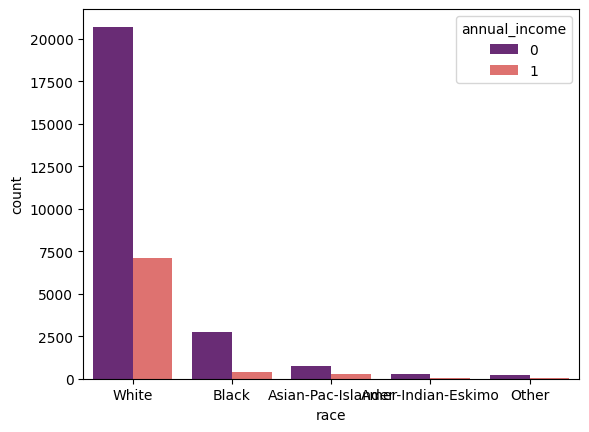

In [317]:
sns.countplot(x=dataset['race'], hue='annual_income', data=dataset, palette='magma');

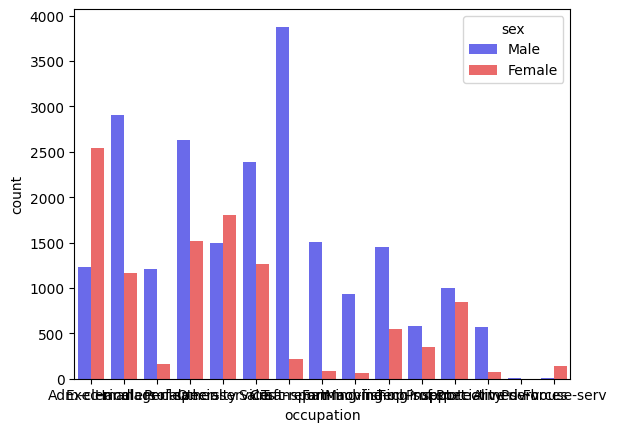

In [318]:
sns.countplot(x=dataset['occupation'], hue='sex', data=dataset, palette='seismic');

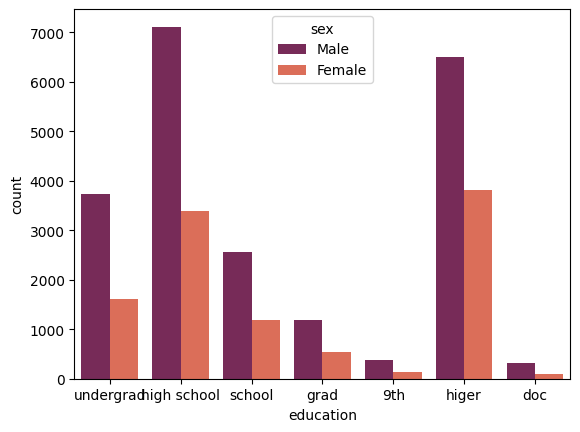

In [319]:
sns.countplot(x=dataset['education'], hue='sex', data=dataset, palette='rocket');
# here in above code the use of semi colon is to remove some information of plot

In [320]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,undergrad,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,undergrad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,high school,9,orhers,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,undergrad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [321]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  annual_income   32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [322]:
df=dataset.copy()

In [323]:
from sklearn.preprocessing import LabelEncoder

In [329]:
le=LabelEncoder()

In [330]:
for col in dataset.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [332]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,6,6,13,0,0,1,4,1,2174,0,40,38,0
1,50,5,6,13,1,3,0,4,1,0,0,13,38,0
2,38,3,4,9,2,5,1,4,1,0,0,40,38,0
3,53,3,5,7,1,5,0,2,1,0,0,40,38,0
4,28,3,6,13,1,10,5,2,0,0,0,40,4,0


# Model Building

In [334]:
X = df.drop(['annual_income'], axis=1)
y = dataset['annual_income']

In [336]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,6,13,0,0,1,4,1,2174,0,40,38
1,50,5,6,13,1,3,0,4,1,0,0,13,38
2,38,3,4,9,2,5,1,4,1,0,0,40,38
3,53,3,5,7,1,5,0,2,1,0,0,40,38
4,28,3,6,13,1,10,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,3,12,1,13,5,4,0,0,0,38,38
32557,40,3,4,9,1,6,0,4,1,0,0,40,38
32558,58,3,4,9,2,0,4,4,0,0,0,40,38
32559,22,3,4,9,0,0,3,4,1,0,0,20,38


In [338]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: annual_income, Length: 32561, dtype: int64

In [339]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=2348)

# Logistic Regression

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [347]:
lr = LogisticRegression()
#model = lr.fit(X_train, y_train)
#prediction = model.predict(X_test)

In [348]:
model = lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [349]:
prediction = model.predict(X_test)

In [350]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [351]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.8116490940730884


In [352]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [353]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[7000  383]
 [1457  929]]


In [354]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7383
           1       0.71      0.39      0.50      2386

    accuracy                           0.81      9769
   macro avg       0.77      0.67      0.69      9769
weighted avg       0.80      0.81      0.79      9769



In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
lr = LogisticRegression()


# Train the model on the training data
model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.813
Acc on test data: 0.812


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [356]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 0.979
Acc on test data: 0.849
